# CS506 Final Project
### Seokhoon Shin & Joshua Nahm

## 1. Importing Library and Dataset('rideshare_kaggle.csv')

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving rideshare_kaggle.csv to rideshare_kaggle.csv


In [99]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## 2. EDA

### EDA process summary
We initially attempted to examine the dataset for missing values, data types, basic statistical summaries, and correlations to identify and remove irrelevant, redundant, or highly correlated features.

In [100]:
# check missing values
print("Missing values:\n", df.isnull().sum())

# check data types
print("\nData types:\n", df.dtypes)

# check statistics
print("\nSummary statistics:\n", df.describe())

Missing values:
 id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime         

In [101]:
# drop missing value from 'price'
df = df.dropna(subset=['price'])
df.isnull().sum().sum()

np.int64(0)

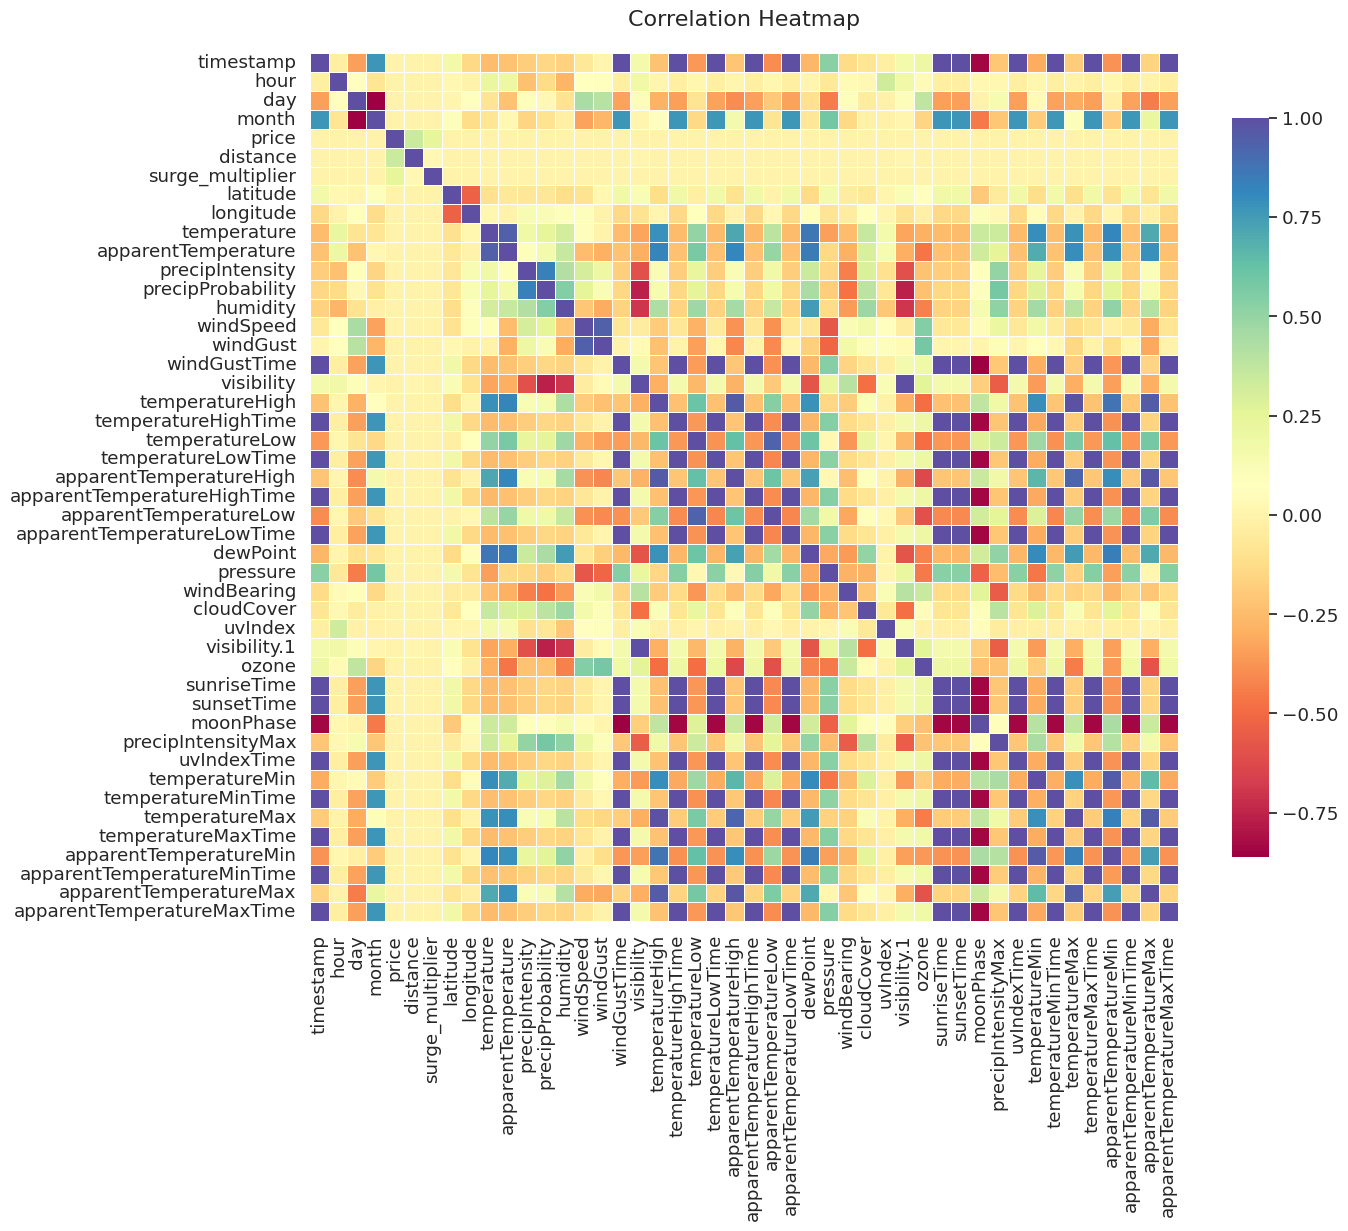

In [102]:
# Correlation Heatmap for numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='Spectral',
    cbar_kws={'shrink': 0.8},
    square=True,
    linewidths=0.5,
    linecolor='white',
    annot=False
)
plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.show()

In [103]:
corr_matrix = numeric_df.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [
    (column, row, upper_triangle.loc[row, column])
    for column in upper_triangle.columns
    for row in upper_triangle.index
    if upper_triangle.loc[row, column] > 0.75
]

for col1, col2, corr_val in high_corr_pairs:
    print(f"{col1} - {col2}: {corr_val:.2f}")

month - timestamp: 0.77
month - day: 0.86
apparentTemperature - temperature: 0.95
precipProbability - precipIntensity: 0.84
windGust - windSpeed: 0.94
windGustTime - timestamp: 1.00
windGustTime - month: 0.77
visibility - precipProbability: 0.76
temperatureHigh - temperature: 0.79
temperatureHigh - apparentTemperature: 0.82
temperatureHighTime - timestamp: 1.00
temperatureHighTime - month: 0.77
temperatureHighTime - windGustTime: 1.00
temperatureLowTime - timestamp: 1.00
temperatureLowTime - month: 0.77
temperatureLowTime - windGustTime: 1.00
temperatureLowTime - temperatureHighTime: 1.00
apparentTemperatureHigh - apparentTemperature: 0.81
apparentTemperatureHigh - temperatureHigh: 0.96
apparentTemperatureHighTime - timestamp: 1.00
apparentTemperatureHighTime - month: 0.77
apparentTemperatureHighTime - windGustTime: 1.00
apparentTemperatureHighTime - temperatureHighTime: 1.00
apparentTemperatureHighTime - temperatureLowTime: 1.00
apparentTemperatureLow - temperatureLow: 0.93
apparentTe

1) We will keep features like month, temperature, visibility, and precipProbability, and remove other features that show strong multicollinearity (correlation > 0.75) with them based on the correlation analysis above.

2) We will additionally drop id and product_id because they are simply unique identifiers that do not contribute to modeling or prediction. The long_summary feature is removed as it is an unstructured text field that overlaps in meaning with short_summary and is not necessary for numerical analysis. The icon feature is also redundant since it duplicates weather summary information. We remove timezone because it remains constant throughout the dataset and does not provide predictive value. The datetime feature is dropped as we have already extracted hour and month features from it, making it redundant. Finally, ozone is dropped as it has little direct influence on rideshare demand or pricing and may introduce unnecessary noise into the model.

*All of these drops will be performed during the data preprocessing stage.

## 3. Visualization Analysis

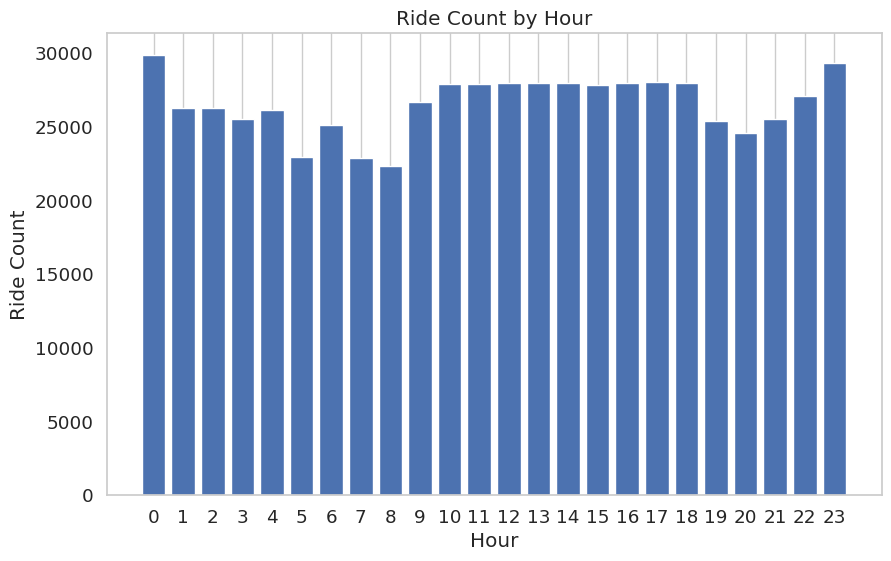

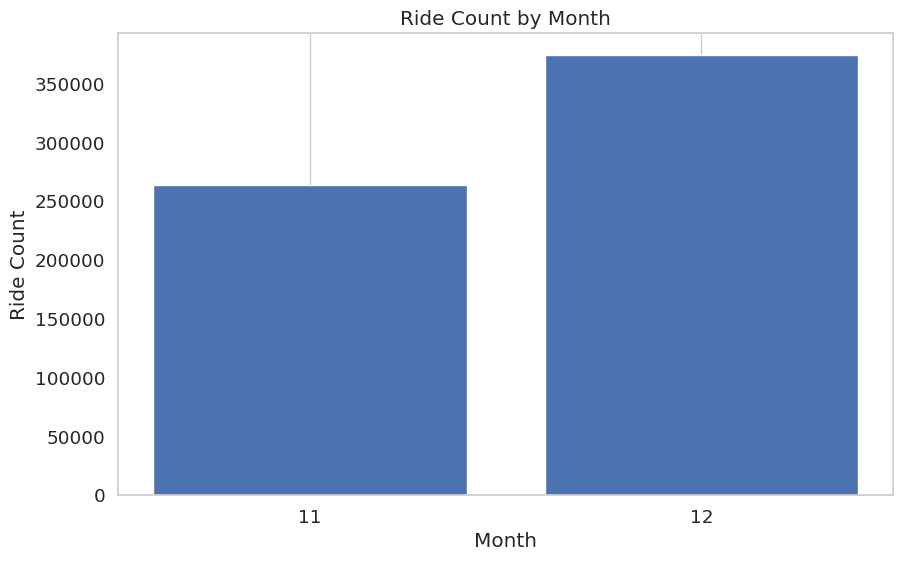

In [105]:
# Time analysis (Hour)
hour_counts = df.groupby('hour').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(hour_counts['hour'], hour_counts['count'])
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.title('Ride Count by Hour')
plt.xticks(hour_counts['hour'])
plt.grid(axis='y')
plt.show()

# Time analysis (Month)
month_counts = df.groupby('month').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(month_counts['month'], month_counts['count'])
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.title('Ride Count by Month')
plt.xticks(month_counts['month'])
plt.grid(axis='y')
plt.show()

1) Ride Count by Hour: The number of rides remains fairly consistent throughout the day, with slightly lower counts during early morning hours (around 4-7 AM), and peaks around midnight and midday.

2) Ride Count by Month: The dataset only includes rides from November (month=11) and December (month=12), with December showing a significantly higher ride count than November. This suggests increased demand during the holiday season.

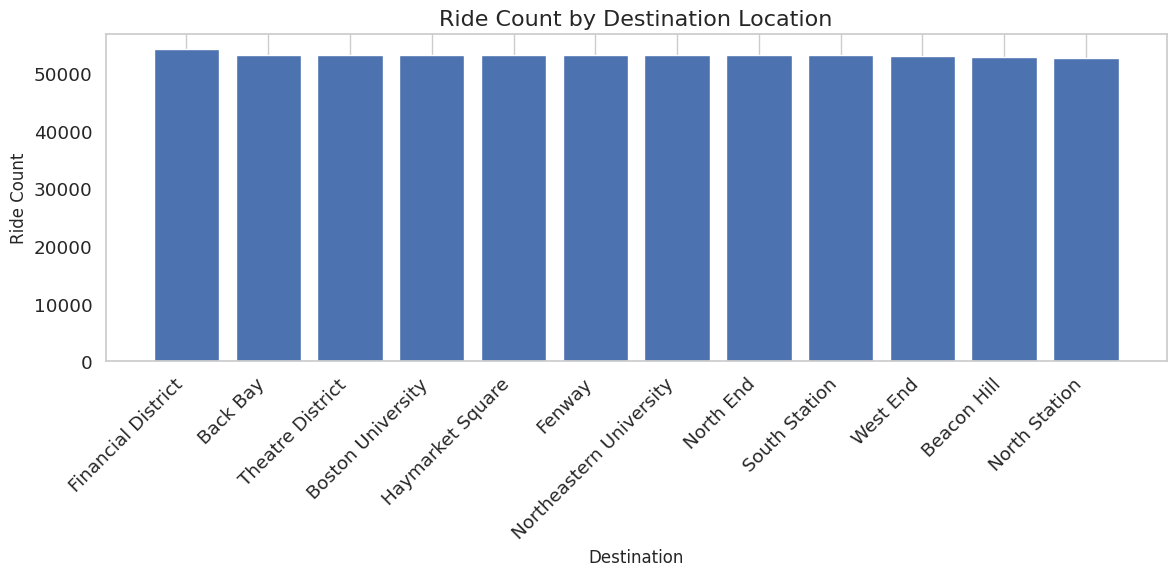

In [106]:
# Destination analysis
destination_counts = df.groupby('destination').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(destination_counts['destination'], destination_counts['count'])
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.title('Ride Count by Destination Location', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1) Financial District has the highest number of rides, indicating it’s the most popular drop-off area. Other destinations, such as Back Bay, Theatre District, and Boston University, also show consistently high and similar ride counts. This suggests that major business and university hubs are frequent destinations.

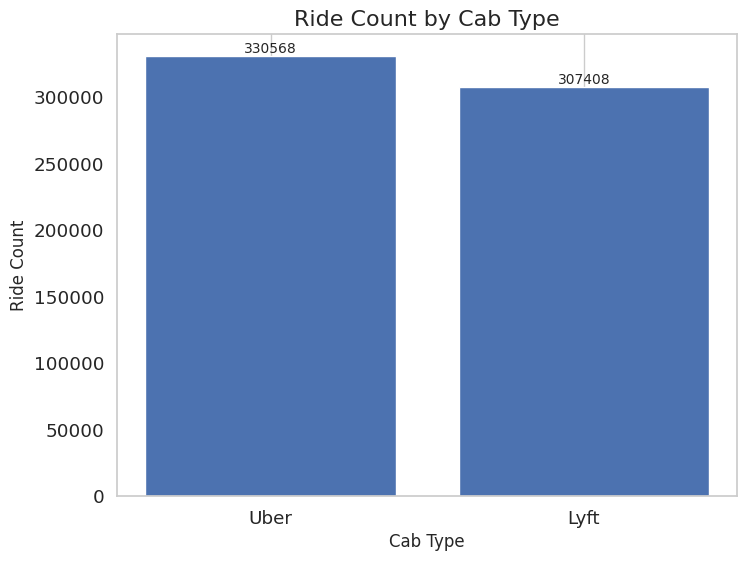

In [107]:
# Cab_type analysis (Uber vs Lyft)
# Ride Count of Cab_type
cab_type_counts = df['cab_type'].value_counts().reset_index()
cab_type_counts.columns = ['cab_type', 'count']

plt.figure(figsize=(8, 6))
bars = plt.bar(cab_type_counts['cab_type'], cab_type_counts['count'])
plt.xlabel('Cab Type', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.title('Ride Count by Cab Type', fontsize=16)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.show()

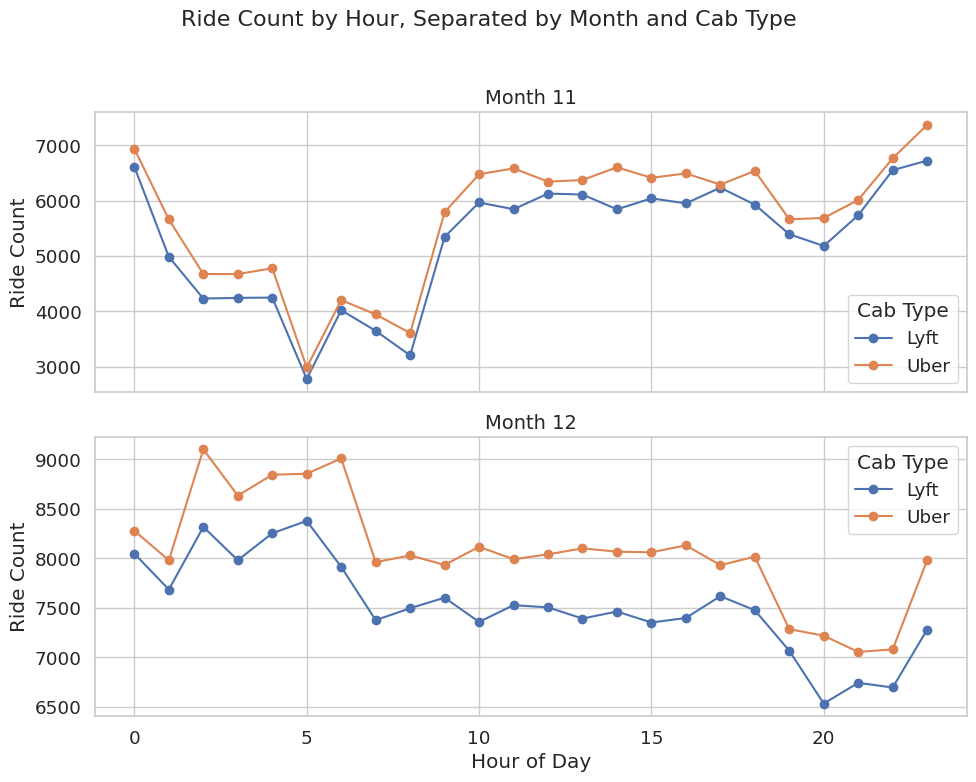

In [108]:
# Line Graph (Month & Hour for Cab_type)
month_hour_cab_counts = df.groupby(['month', 'hour', 'cab_type']).size().reset_index(name='count')
unique_months = month_hour_cab_counts['month'].unique()
num_months = len(unique_months)
fig, axes = plt.subplots(num_months, 1, figsize=(10, 4 * num_months), sharex=True)

for idx, month in enumerate(sorted(unique_months)):
    ax = axes[idx] if num_months > 1 else axes
    month_data = month_hour_cab_counts[month_hour_cab_counts['month'] == month]

    for cab_type in month_data['cab_type'].unique():
        subset = month_data[month_data['cab_type'] == cab_type]
        ax.plot(subset['hour'], subset['count'], marker='o', label=cab_type)

    ax.set_title(f'Month {month}', fontsize=14)
    ax.set_ylabel('Ride Count')
    ax.legend(title='Cab Type')
    ax.grid(True)

plt.xlabel('Hour of Day')
plt.suptitle('Ride Count by Hour, Separated by Month and Cab Type', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1) There are more Uber rides compared to Lyft overall, as seen in the bar chart.
When broken down by hour and month, Uber consistently has higher ride counts than Lyft in both November and December.
Both services follow a similar daily pattern: low activity in the early morning hours, rising steadily throughout the day, and peaking in the evening.
The increase in December is noticeable for both services, likely due to holiday activity.

We will further investigate whether this preference for Uber is influenced by pricing by analyzing the price differences next.

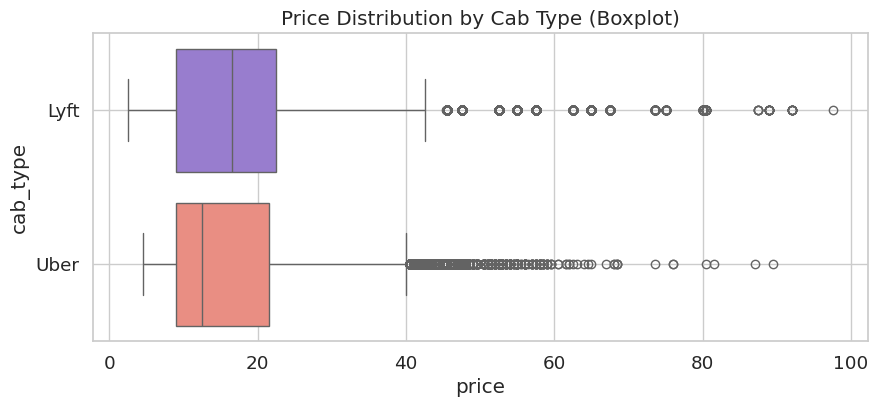

In [109]:
uber_prices = df[df['cab_type'] == 'Uber']['price']
lyft_prices = df[df['cab_type'] == 'Lyft']['price']

combined = pd.DataFrame({
    'price': pd.concat([lyft_prices, uber_prices]),
    'cab_type': ['Lyft'] * len(lyft_prices) + ['Uber'] * len(uber_prices)
})
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=combined, y='cab_type', x='price', orient='h', palette=['mediumpurple', 'salmon'])
plt.title('Price Distribution by Cab Type (Boxplot)')
plt.grid(True)
plt.show()

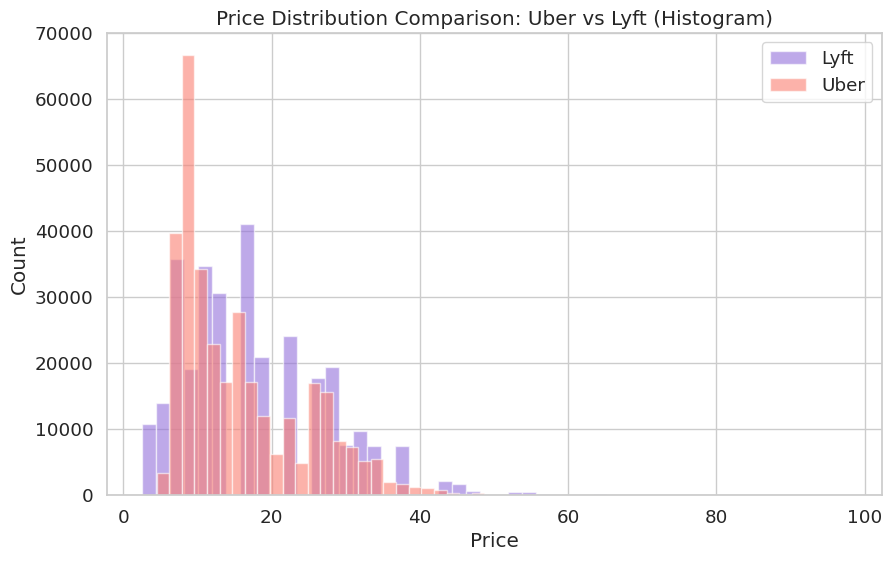

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(lyft_prices, bins=50, alpha=0.6, label='Lyft', color='mediumpurple')
plt.hist(uber_prices, bins=50, alpha=0.6, label='Uber', color='salmon')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution Comparison: Uber vs Lyft (Histogram)')
plt.legend()
plt.grid(True)
plt.show()

1) The median and maximum price for Lyft are both higher than those of Uber.
Looking at the distribution, Uber is used more frequently at lower price ranges, indicating that users tend to choose Uber for cheaper rides.
However, Uber also has more outliers on the higher end of the price spectrum.
We think that this is likely due to the availability of premium or luxury vehicle options in Uber’s service offerings.

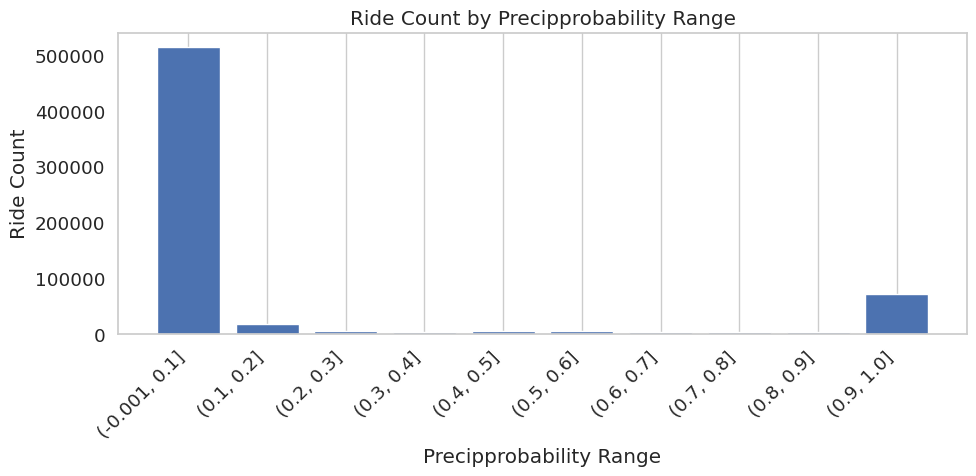

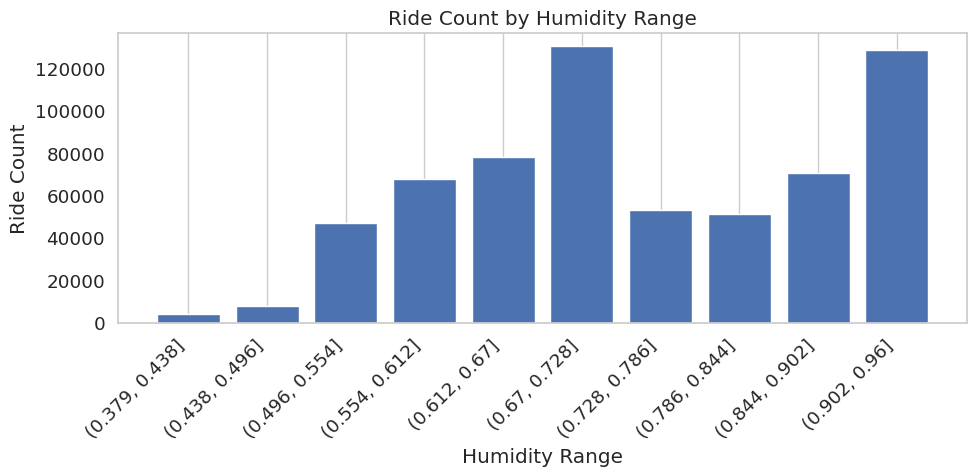

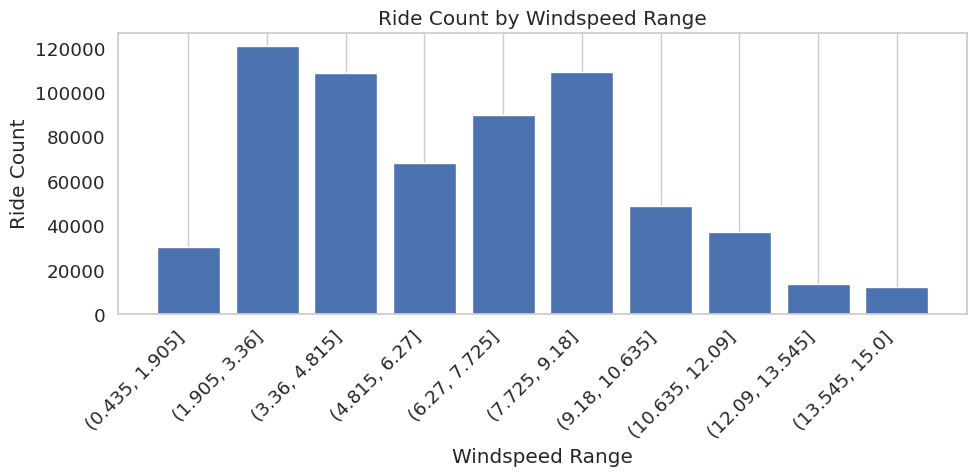

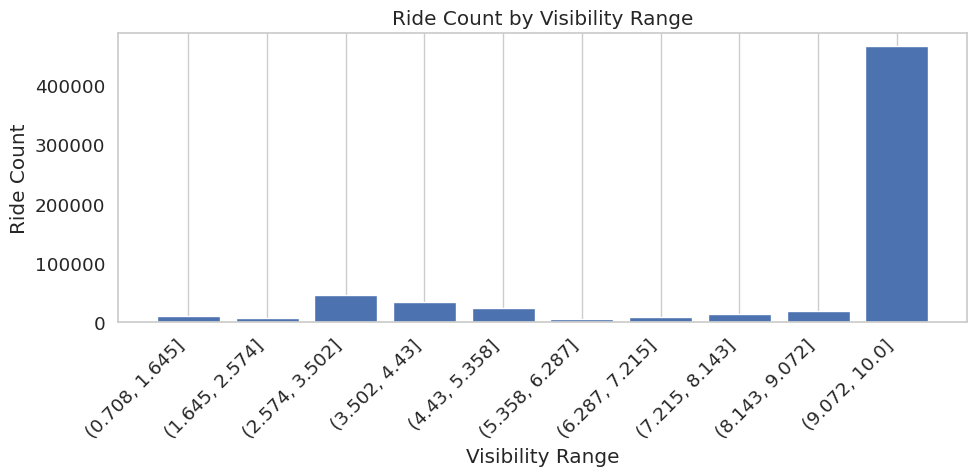

In [111]:
# Weather analysis
weather_features = ['precipProbability', 'humidity', 'windSpeed', 'visibility']

for feature in weather_features:
    df[feature + '_bin'] = pd.cut(df[feature], bins=10)
    count_by_bin = df.groupby(feature + '_bin').size().reset_index(name='count')
    count_by_bin['bin_str'] = count_by_bin[feature + '_bin'].astype(str)

    # bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(count_by_bin['bin_str'], count_by_bin['count'])
    plt.title(f'Ride Count by {feature.capitalize()} Range')
    plt.xlabel(f'{feature.capitalize()} Range')
    plt.ylabel('Ride Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

1) Weather Impact Analysis

1. Precipitation Probability vs Ride Count
The majority of rides occur when precipitation probability is low (0-10%).
As precipitation probability increases, ride count significantly drops.
A small spike is observed at 90-100% precipitation probability, possibly due to increased ride demand during heavy rain.
2. Humidity vs Ride Count
Ride count generally increases with humidity, peaking around 72-78% humidity.
A sharp decline follows after 78% humidity, possibly indicating a threshold where extreme humidity reduces ride demand.
3. Wind Speed vs Ride Count
Ride count is highest when wind speed is around 3-9 mph.
Rides decline as wind speed increases beyond 12 mph, likely due to worsening travel conditions.
4. Visibility vs Ride Count
The majority of rides occur when visibility is high (9-10 miles).
Low visibility (under 3 miles) significantly reduces ride count, suggesting poor driving conditions discourage ride requests.

Humidity and visibility appear to be the most influential weather factors affecting ride count.
People tend to request more rides when humidity is moderate and visibility is high.
Extreme weather conditions (high precipitation, strong winds, low visibility) decrease ride count, likely due to safety concerns and fewer available drivers.

## 4. Data Preprocessing

#### 1) Drop unnecessary, redundant features

In [127]:
# features to drop
to_drop = [
    'timestamp', 'day', 'distance', 'apparentTemperature', 'precipIntensity', 'windGust',
    'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
    'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime',
    'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime',
    'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
    'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime',
    'id', 'product_id', 'long_summary', 'icon', 'timezone', 'datetime', 'ozone'
]

df_cleaned = df.drop(columns=to_drop)

print("Remaining features:")
print(df_cleaned.columns.tolist())
print("Remaining shape:", df_cleaned.shape)

Remaining features:
['hour', 'month', 'source', 'destination', 'cab_type', 'name', 'price', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'precipProbability_bin', 'humidity_bin', 'windSpeed_bin', 'visibility_bin']
Remaining shape: (637976, 25)


In [129]:
# bin features drop
bin_columns = [col for col in df_cleaned.columns if 'bin' in col]
df_cleaned = df_cleaned.drop(columns=bin_columns)

print(f"Dropped bin columns: {bin_columns}")
print(f"New shape after dropping bin columns: {df_cleaned.shape}")
print("Remaining features:")
print(df_cleaned.columns.tolist())
print("Remaining shape:", df_cleaned.shape)

Dropped bin columns: []
New shape after dropping bin columns: (637976, 21)
Remaining features:
['hour', 'month', 'source', 'destination', 'cab_type', 'name', 'price', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax']
Remaining shape: (637976, 21)


We additionally dropped the *_bin columns, as they were only used for exploratory visualizations and are not suitable for modeling. These interval-based features could cause errors and do not provide additional predictive power, so they were removed to keep the dataset clean and ready for training.

#### 2) Exclude Outliers

In [130]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

print("Outliers removed shape:", df_no_outliers.shape)

Outliers removed shape: (632387, 21)


#### 3) Encoding Categorical features

In [131]:
categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['source', 'destination', 'cab_type', 'name', 'short_summary']


In [132]:
# Label Encoding
df_clean_label = df_cleaned.copy()
le = LabelEncoder()

for col in df_clean_label.select_dtypes(include='O').columns:
    df_clean_label[col] = le.fit_transform(df_clean_label[col])

print("Label Encoding Shape:", df_clean_label.shape)

Label Encoding Shape: (637976, 21)


In [133]:
def one_hot_encoder(data, feature, keep_first=True):
    one_hot_cols = pd.get_dummies(data[feature])

    for col in one_hot_cols.columns:
        one_hot_cols.rename({col: f'{feature}_' + str(col)}, axis=1, inplace=True)

    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)

    if keep_first is False:
        new_data = new_data.iloc[:, 1:]

    return new_data

df_clean_encoded = df_cleaned.copy()
for col in df_clean_encoded.select_dtypes(include='O').columns:
    df_clean_encoded = one_hot_encoder(df_clean_encoded, col)

print("One-Hot Encoding Shape:", df_clean_encoded.shape)

One-Hot Encoding Shape: (637976, 63)


We created two versions of the dataset for different modeling needs.
The Label Encoded version (df_clean_label) is used for tree-based models like Random Forest and XGBoost, which can handle integer-labeled categories effectively.
The One-Hot Encoded version (df_clean_encoded) is used for models such as Neural Networks, Linear Regression, and KNN, which require categorical variables to be represented as independent binary features to avoid implying any ordinal relationship.

## 4) Modeling

In [134]:
# Feature, Target
X_label = df_clean_label.drop('price', axis=1)
y_label = df_clean_label['price']

X_onehot = df_clean_encoded.drop('price', axis=1)
y_onehot = df_clean_encoded['price']

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y_onehot, test_size=0.2, random_state=42)

print(f"X_train_label shape: {X_train_label.shape}")
print(f"X_test_label shape: {X_test_label.shape}")
print(f"y_train_label shape: {y_train_label.shape}")
print(f"y_test_label shape: {y_test_label.shape}")

print(f"X_train_onehot shape: {X_train_onehot.shape}")
print(f"X_test_onehot shape: {X_test_onehot.shape}")
print(f"y_train_onehot shape: {y_train_onehot.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")

X_train_label shape: (510380, 20)
X_test_label shape: (127596, 20)
y_train_label shape: (510380,)
y_test_label shape: (127596,)
X_train_onehot shape: (510380, 62)
X_test_onehot shape: (127596, 62)
y_train_onehot shape: (510380,)
y_test_onehot shape: (127596,)


### a) Random Forest

In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_label, y_train_label)

y_pred_train_rf = rf.predict(X_train_label)
y_pred_test_rf = rf.predict(X_test_label)

print("Random Forest Results:")
print("Train R2:", round(r2_score(y_train_label, y_pred_train_rf), 3))
print("Test R2:", round(r2_score(y_test_label, y_pred_test_rf), 3))
print("Test MAE:", round(mean_absolute_error(y_test_label, y_pred_test_rf), 2))

Random Forest Results:
Train R2: 0.977
Test R2: 0.948
Test MAE: 1.35


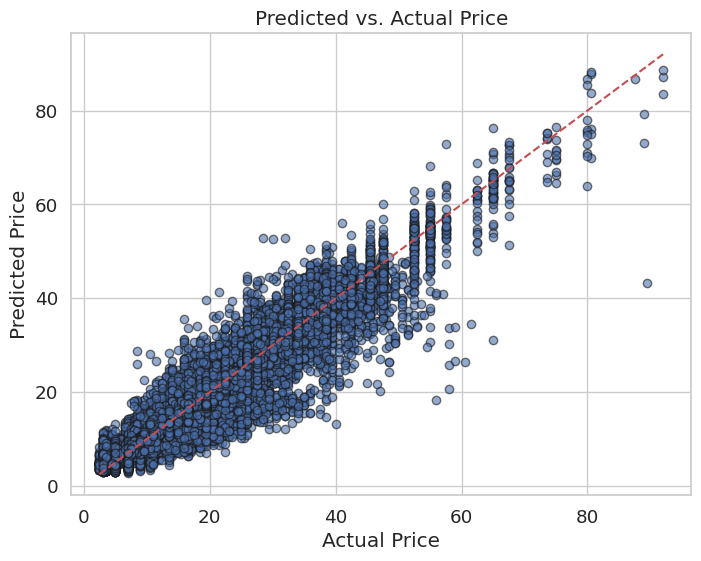

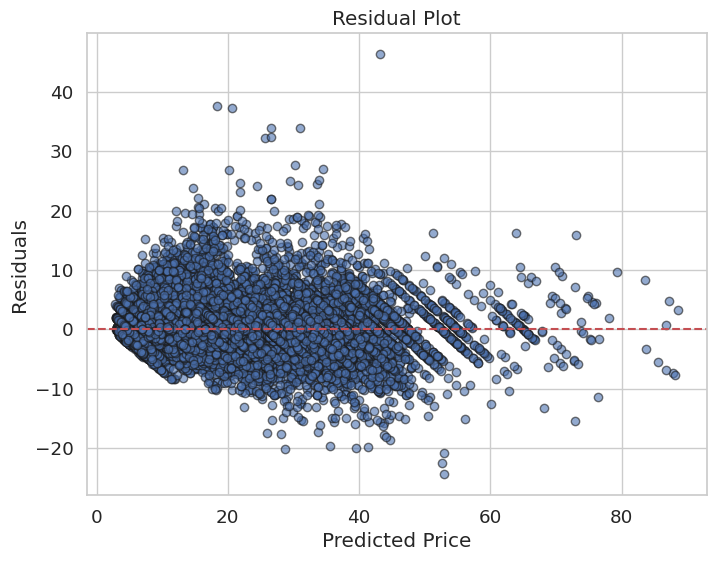

In [143]:
# Predicted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_label, y_pred_test_rf, alpha=0.6, edgecolor='k')
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. Actual Price")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test_label - y_pred_test_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_rf, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

### b) XGBoost

In [138]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_label, y_train_label)
y_pred_train_xgb = xgb.predict(X_train_label)
y_pred_test_xgb = xgb.predict(X_test_label)
print("XGBoost Results:")
print("Train R2:", round(r2_score(y_train_label, y_pred_train_xgb), 3))
print("Test R2:", round(r2_score(y_test_label, y_pred_test_xgb), 3))
print("Test MAE:", round(mean_absolute_error(y_test_label, y_pred_test_xgb), 2))

XGBoost Results:
Train R2: 0.959
Test R2: 0.959
Test MAE: 1.25


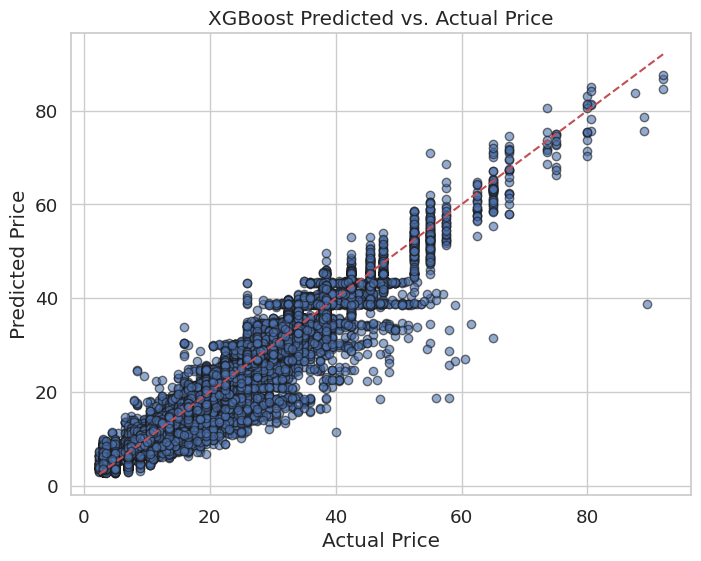

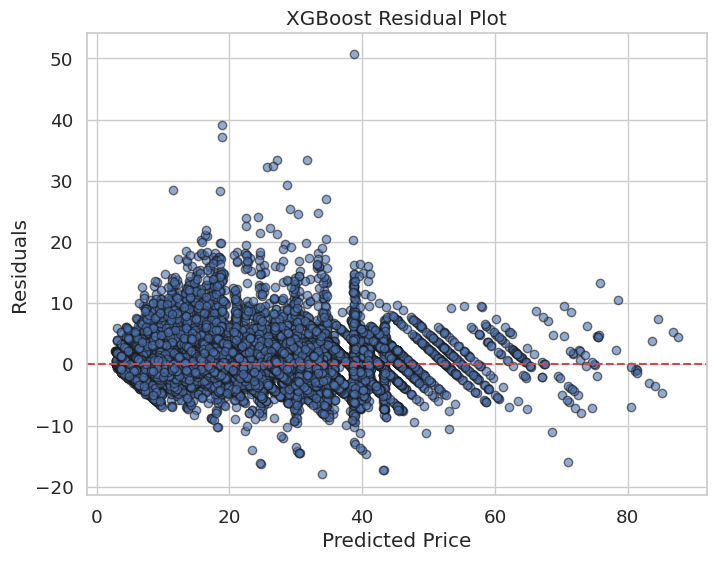

In [139]:
# Predicted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_label, y_pred_test_xgb, alpha=0.6, edgecolor='k')
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost Predicted vs. Actual Price")
plt.grid(True)
plt.show()

# Residual Plot
residuals_xgb = y_test_label - y_pred_test_xgb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_xgb, residuals_xgb, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("XGBoost Residual Plot")
plt.grid(True)
plt.show()

### c) Linear Regression

In [141]:
lr = LinearRegression()
lr.fit(X_train_onehot, y_train_onehot)
y_pred_train_lr = lr.predict(X_train_onehot)
y_pred_test_lr = lr.predict(X_test_onehot)
print("Linear Regression Results:")
print("Train R2:", round(r2_score(y_train_onehot, y_pred_train_lr), 3))
print("Test R2:", round(r2_score(y_test_onehot, y_pred_test_lr), 3))
print("Test MAE:", round(mean_absolute_error(y_test_onehot, y_pred_test_lr), 2))

Linear Regression Results:
Train R2: 0.856
Test R2: 0.857
Test MAE: 2.57


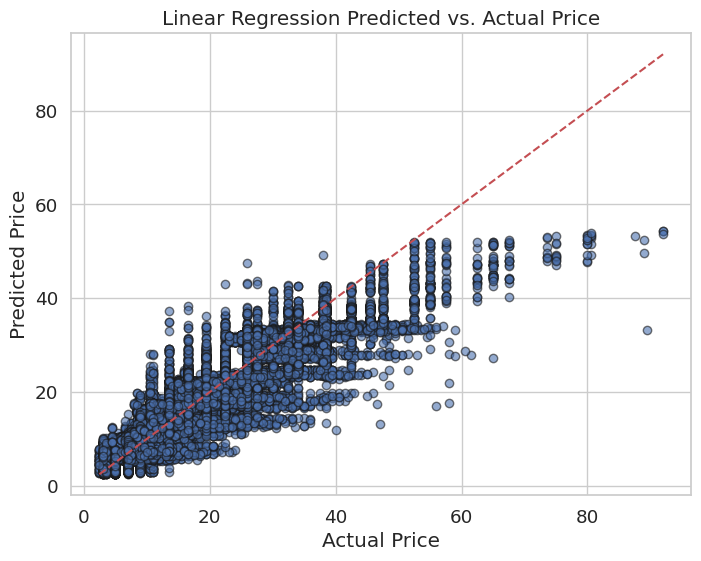

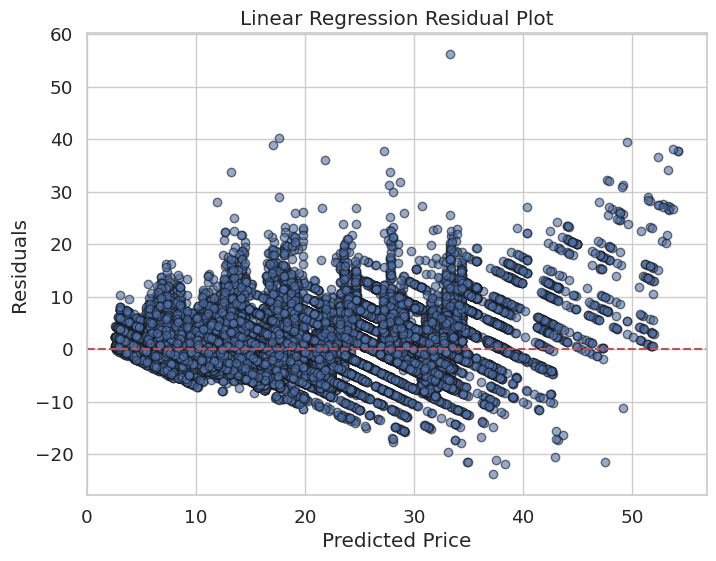

In [142]:
# Predicted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_onehot, y_pred_test_lr, alpha=0.6, edgecolor='k')
plt.plot([y_test_onehot.min(), y_test_onehot.max()], [y_test_onehot.min(), y_test_onehot.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predicted vs. Actual Price")
plt.grid(True)
plt.show()

# Residual Plot
residuals_lr = y_test_onehot - y_pred_test_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_lr, residuals_lr, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")
plt.grid(True)
plt.show()

### d) Neural Network

In [ ]:
nn = MLPRegressor(random_state=42, max_iter=500)
nn.fit(X_train, y_train)

y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)

print("Neural Network (MLP) Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))

Neural Network (MLP) Results:
Train R2: 0.951
Test R2: 0.95
Test MAE: 1.34


#### e) KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print("KNN (with scaling) Results:")
print("Train R2:", round(r2_score(y_train, y_pred_train), 3))
print("Test R2:", round(r2_score(y_test, y_pred_test), 3))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test), 2))

KNN (with scaling) Results:
Train R2: 0.948
Test R2: 0.946
Test MAE: 1.33
